### Eduardo David González Flores

In [4]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!python3 --version

Python 3.10.12


In [6]:
conn = psycopg2.connect(
    host="localhost",
    database="nfl",
    user="postgres",
    password="password"
)

In [7]:
cur = conn.cursor()
cur.execute('SELECT version()')
db_version = cur.fetchone()
print(db_version)
cur.close()

('PostgreSQL 15.3 (Ubuntu 15.3-1.pgdg20.04+1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0, 64-bit',)


In [8]:
def sql_to_dataframe(conn, query, column_names):
    cur = conn.cursor()
    try:
        cur.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cur.close()
        return 1
    tuples_list = cur.fetchall()
    cur.close()
    df = pd.DataFrame(tuples_list, columns=column_names)
    return df

In [9]:
query = 'SELECT * from equipos'
columns = ['id', 'nombre', 'ciudad', 'conferencia', 'division']
equipos = sql_to_dataframe(conn, query, columns)
equipos

,id,nombre,ciudad,conferencia,division
0,1,Arizona Cardinals,Arizona,NFC,Oeste
1,2,Atlanta Falcons,Atlanta,NFC,Sur
2,3,Baltimore Ravens,Baltimore,AFC,Norte
3,4,Buffalo Bills,Buffalo,AFC,Este
4,5,Carolina Panthers,Carolina,NFC,Sur
5,6,Chicago Bears,Chicago,NFC,Norte
6,7,Cincinnati Bengals,Cincinnati,AFC,Norte
7,8,Cleveland Browns,Cleveland,AFC,Norte
8,9,Dallas Cowboys,Dallas,NFC,Este
9,10,Denver Broncos,Denver,AFC,Oeste


In [10]:
grupo = equipos.groupby(['conferencia', 'division', 'nombre']).max()
grupo

id         ciudad
conferencia division nombre                                     
AFC         Este     Buffalo Bills              4        Buffalo
                     Miami Dolphins            19          Miami
                     New England Patriots      21    New England
                     New York Jets             24       New York
            Norte    Baltimore Ravens           3      Baltimore
                     Cincinnati Bengals         7     Cincinnati
                     Cleveland Browns           8      Cleveland
                     Pittsburgh Steelers       27     Pittsburgh
            Oeste    Denver Broncos            10         Denver
                     Kansas City Chiefs        16    Kansas City
                     Las Vegas Raiders         25      Las Vegas
                     Los Angeles Chargers      17    Los Angeles
            Sur      Houston Texans            13        Houston
                     Indianapolis Colts        14   Indianapolis
                     Jacksonville Jaguars      15   Jacksonville
                     Tennessee Titans          31      Tennessee
NFC         Este     Dallas Cowboys             9         Dallas
                     New York Giants           23       New York
                     Philadelphia Eagles       26   Philadelphia
                     Washington Football Team  32     Washington
            Norte    Chicago Bears              6        Chicago
                     Detroit Lions             11        Detroit
                     Green Bay Packers         12      Green Bay
                     Minnesota Vikings         20      Minnesota
            Oeste    Arizona Cardinals          1        Arizona
                     Los Angeles Rams          18    Los Angeles
                     San Francisco 49ers       28  San Francisco
                     Seattle Seahawks          29        Seattle
            Sur      Atlanta Falcons            2        Atlanta
                     Carolina Panthers          5       Carolina
                     New Orleans Saints        22    New Orleans
                     Tampa Bay Buccaneers      30      Tampa Bay

In [11]:
query = 'SELECT * from jugadores'
columns = ['id', 'nombre', 'apellido', 'posicion', 'equipo']
jugadores = sql_to_dataframe(conn, query, columns)
jugadores.head()

,id,nombre,apellido,posicion,equipo
0,63,Trent,Williams,Offensive Tackle,28
1,64,David,Bakhtiari,Offensive Tackle,12
2,65,Ryan,Ramczyk,Offensive Tackle,18
3,66,Laremy,Tunsil,Offensive Tackle,13
4,67,Taylor,Lewan,Offensive Tackle,31


In [12]:
jugadores['posicion'].value_counts()

Offensive Tackle    9
Guard               9
Center              9
Safety              9
Quarterback         4
Kicker              4
Name: posicion, dtype: int64

In [13]:
df = pd.merge(jugadores, equipos[['id', 'nombre']], left_on='equipo', right_on='id', how='left').drop(columns=['id_x', 'id_y', 'equipo'])
df.rename(columns = {'nombre_x':'nombre', 'nombre_y':'equipo'}, inplace=True)
df.head()

,nombre,apellido,posicion,equipo
0,Trent,Williams,Offensive Tackle,San Francisco 49ers
1,David,Bakhtiari,Offensive Tackle,Green Bay Packers
2,Ryan,Ramczyk,Offensive Tackle,Los Angeles Rams
3,Laremy,Tunsil,Offensive Tackle,Houston Texans
4,Taylor,Lewan,Offensive Tackle,Tennessee Titans


In [14]:
df['posicion'].value_counts()

Offensive Tackle    9
Guard               9
Center              9
Safety              9
Quarterback         4
Kicker              4
Name: posicion, dtype: int64

In [15]:
df['equipo'].value_counts()

Denver Broncos              3
Pittsburgh Steelers         3
Las Vegas Raiders           3
Tampa Bay Buccaneers        3
San Francisco 49ers         2
Kansas City Chiefs          2
Chicago Bears               2
Green Bay Packers           2
Washington Football Team    2
Cleveland Browns            2
Buffalo Bills               2
Dallas Cowboys              2
Los Angeles Rams            2
Los Angeles Chargers        2
Cincinnati Bengals          1
Seattle Seahawks            1
Philadelphia Eagles         1
Detroit Lions               1
New York Jets               1
New Orleans Saints          1
Indianapolis Colts          1
New England Patriots        1
Atlanta Falcons             1
Tennessee Titans            1
Houston Texans              1
Miami Dolphins              1
Name: equipo, dtype: int64

/tmp/ipykernel_190536/1808495485.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(conteo_equipos.index, rotation='vertical')


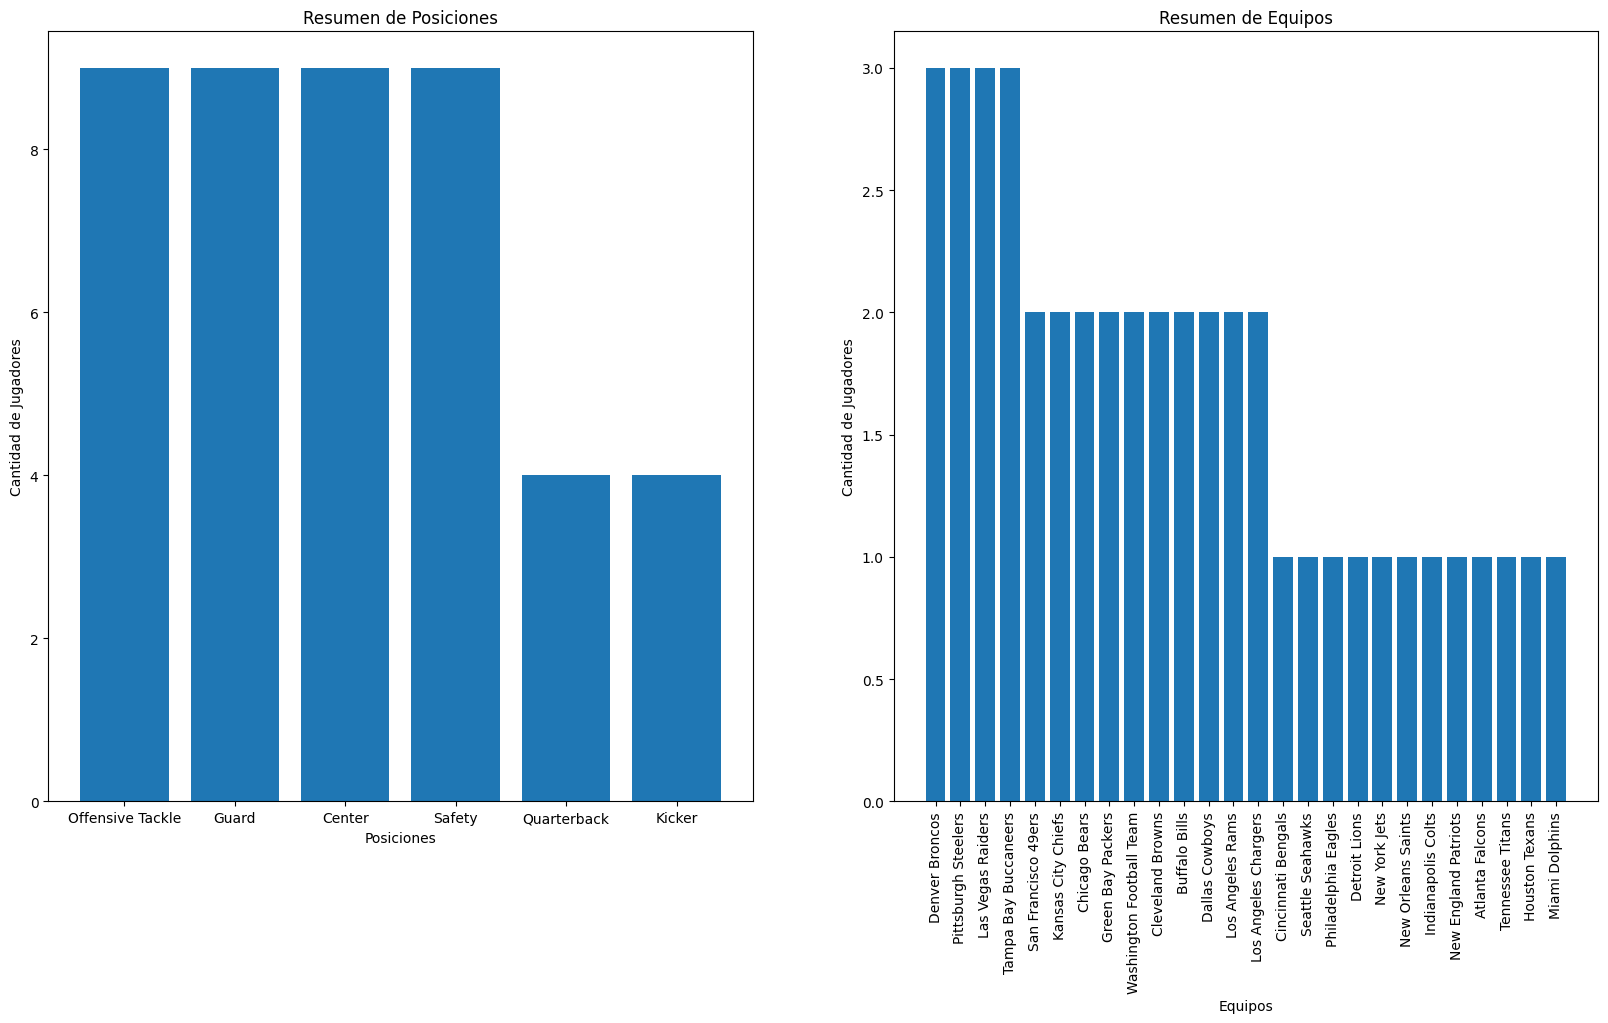

In [20]:
# Obtener el conteo de posiciones y equipos
conteo_posiciones = df['posicion'].value_counts()
conteo_equipos = df['equipo'].value_counts()

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico de barras para las posiciones
ax1.bar(conteo_posiciones.index, conteo_posiciones.values)
ax1.set_xlabel('Posiciones')
ax1.set_ylabel('Cantidad de Jugadores')
ax1.set_title('Resumen de Posiciones')

# Gráfico de barras para los equipos
ax2.bar(conteo_equipos.index, conteo_equipos.values)
ax2.set_xlabel('Equipos')
ax2.set_ylabel('Cantidad de Jugadores')
ax2.set_title('Resumen de Equipos')
ax2.set_xticklabels(conteo_equipos.index, rotation='vertical')

# Mostrar la gráfica
plt.show()

In [21]:
conn.close()